# Rainfall Prediction using Linear Regression

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read data
df=pd.read_csv('austin_weather.csv')

In [3]:
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [4]:
#drop cols
df=df.drop(['Events','Date','SeaLevelPressureLowInches'],axis=1)

In [5]:
df=df.replace("T",0.0)

In [6]:
df=df.replace('-',0.0)

In [7]:
df.to_csv('austin_weather_final.csv')

In [8]:
import sklearn as s
from sklearn.linear_model import LinearRegression


In [9]:
df1=pd.read_csv("austin_weather_final.csv")

In [10]:
X=df1.drop(["PrecipitationSumInches"],axis=1)

In [11]:
Y=df1['PrecipitationSumInches']

In [12]:
Y=Y.values.reshape(-1,1)

In [13]:
Y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [14]:
day_index=798
days=[ i for i in range(Y.size)]

In [15]:
#Initalize linear regression
clf=LinearRegression()
clf.fit(X,Y)

LinearRegression()

The precipitation graph


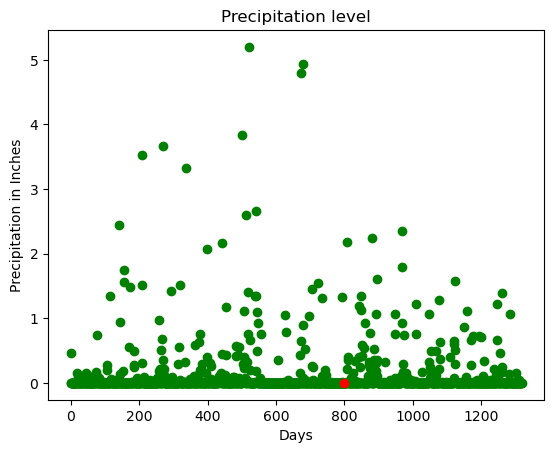

In [17]:
print("The precipitation graph")
plt.scatter(days,Y,color='g')
plt.scatter(days[day_index],Y[day_index],color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in Inches")
plt.show()
x_vis=X.filter(['TempAvgF','DewPointAvgF','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH'])

Precipitation vs attribute trend graph: 


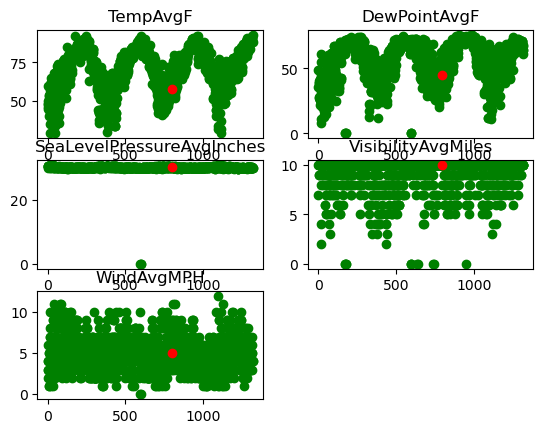

In [20]:
print("Precipitation vs attribute trend graph: ")
for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days,x_vis[x_vis.columns.values[i][:100]],color='g')
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r')

    plt.title(x_vis.columns.values[i])
plt.show()